In [107]:
import pandas as pd
train = pd.read_csv('train.csv')
test = pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Feature Cleaning
- encode male and female (1 and 0)
- drop passengerid, name, ticket and cabin
- encode C, Q and S (0, 1, 2)
- fill missing age with median of group with matching sex and class
- fill missing embarked with most common departure

In [108]:
train.replace('male', 1, inplace=True)
train.replace('female', 0, inplace=True)

train['Embarked'] = train['Embarked'].replace(['Q', 'S', 'C'], [0, 1, 2])

train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)
train['Embarked'].isna().sum()

train.drop(columns=['PassengerId','Name', 'Ticket', 'Cabin'], inplace=True)

train['Age'] = train.groupby(['Sex', 'Pclass'], group_keys=False)['Age'].transform(lambda x: x.fillna(x.median()))


# Intial Random Forest Classifier
- grid search to find intial best hyperparameters
- assess intial performance
- feature importances

Accuracy: 0.822429906542056 



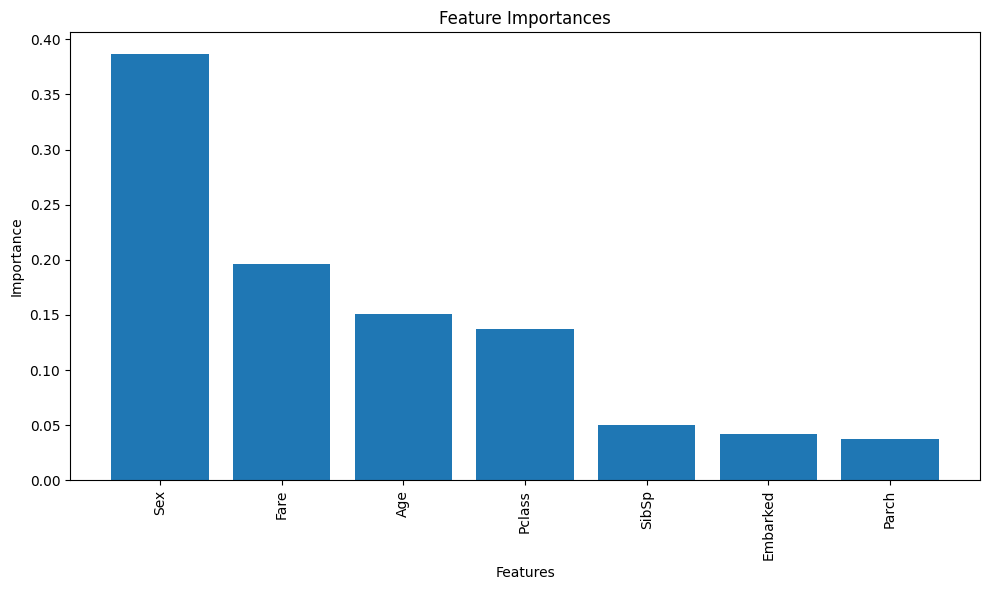

In [109]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

# Split the data into features (X) and target variable (y)
X = train.drop(columns=['Survived'])
y = train['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)


'''
# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier()

# Perform grid search using cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best hyperparameters and best score
print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)
'''


#Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
#Best Score: 0.8382022471910112



# Initialize the Random Forest Classifier with best hyperparameters
rf_classifier = RandomForestClassifier(n_estimators=200,
                                       max_depth=5,
                                       min_samples_split=2,
                                       min_samples_leaf=1,
                                       max_features = 0.5)

# Fit the classifier to the training data
rf_classifier.fit(X_train, y_train)

# Predict the target variable for the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy, "\n")



# Obtain feature importances
importances = rf_classifier.feature_importances_

# Create a list of feature names
feature_names = X_train.columns

# Create a dictionary to store feature importances
feature_importance_dict = dict(zip(feature_names, importances))

# Sort the dictionary by feature importance (in descending order)
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Extract sorted feature names and importances
sorted_feature_names = [f[0] for f in sorted_feature_importance]
sorted_importances = [f[1] for f in sorted_feature_importance]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importances)), sorted_importances, align='center')
plt.xticks(range(len(sorted_importances)), sorted_feature_names, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()

# Exploration
- Did subsets of variables survive more?
- Can less important variables be transformed into more useful form?

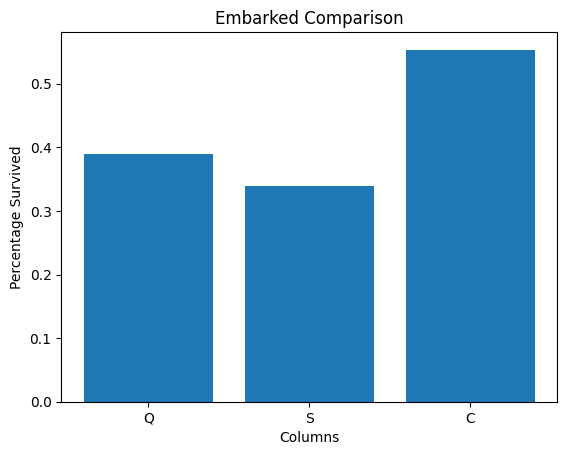

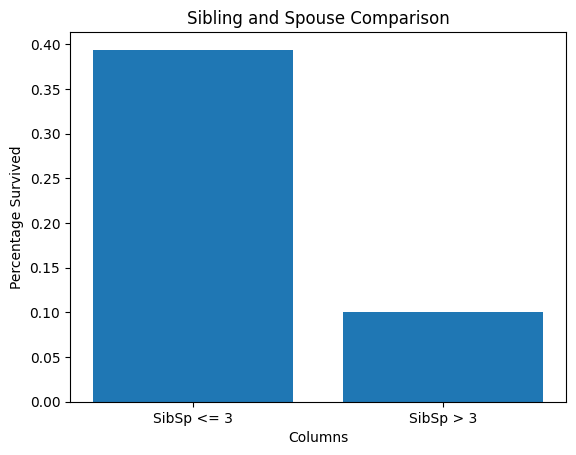

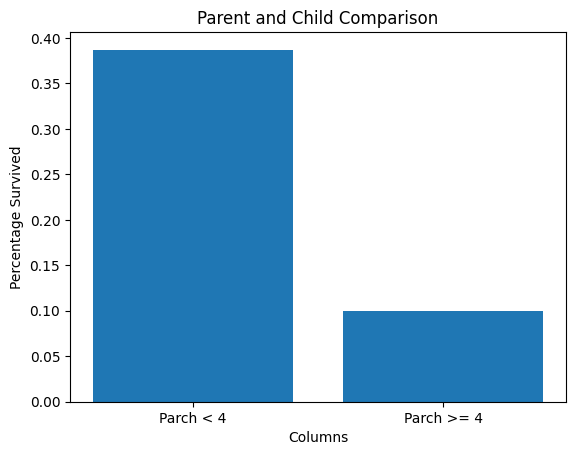

In [110]:




# Calculate the mean of each column

column1_mean = train[train['Embarked'] == 0.0]['Survived'].mean()
column2_mean = train[train['Embarked'] == 1.0]['Survived'].mean()
column3_mean = train[train['Embarked'] == 2.0]['Survived'].mean()

# Create a bar plot
plt.bar(['Q', 'S', 'C'], [column1_mean, column2_mean, column3_mean])

# Set labels and title
plt.xlabel('Columns')
plt.ylabel('Percentage Survived')
plt.title('Embarked Comparison')

# Display the plot
plt.show()



# Calculate the mean of each column
column1_mean = train[train['SibSp'] <= 3]['Survived'].mean()
column2_mean = train[train['SibSp'] > 3]['Survived'].mean()

# Create a bar plot
plt.bar(['SibSp <= 3', 'SibSp > 3'], [column1_mean, column2_mean])

# Set labels and title
plt.xlabel('Columns')
plt.ylabel('Percentage Survived')
plt.title('Sibling and Spouse Comparison')

# Display the plot
plt.show()


# Calculate the mean of each column
column1_mean = train[train['Parch'] < 4]['Survived'].mean()
column2_mean = train[train['Parch'] >= 4]['Survived'].mean()

# Create a bar plot
plt.bar(['Parch < 4', 'Parch >= 4'], [column1_mean, column2_mean])

# Set labels and title
plt.xlabel('Columns')
plt.ylabel('Percentage Survived')
plt.title('Parent and Child Comparison')

# Display the plot
plt.show()



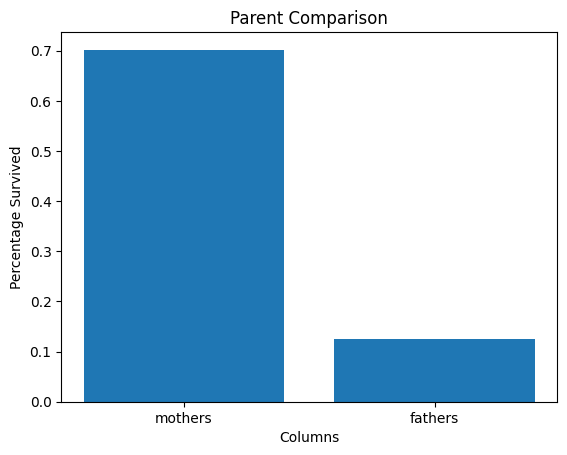

In [111]:

column1_mean = train[(train['Parch'] > 0) & (train['Sex'] == 0) & (train['Age'] > 25) ]['Survived'].mean()
column2_mean = train[(train['Parch'] > 0) & (train['Sex'] == 1) & (train['Age'] > 25) ]['Survived'].mean()

# Create a bar plot
plt.bar(['mothers', 'fathers'], [column1_mean, column2_mean])

# Set labels and title
plt.xlabel('Columns')
plt.ylabel('Percentage Survived')
plt.title('Parent Comparison')

# Display the plot
plt.show()

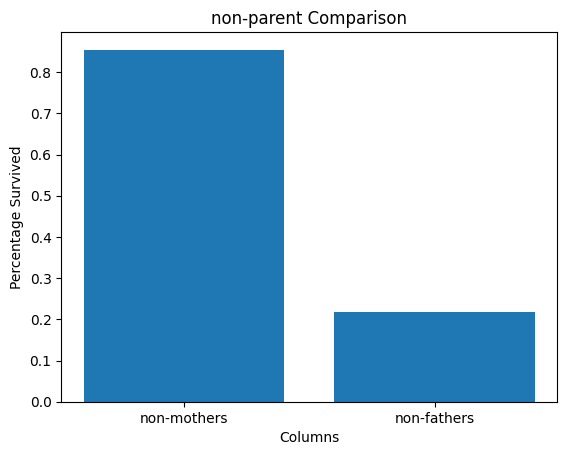

In [112]:
column1_mean = train[(train['Parch'] == 0) & (train['Sex'] == 0) & (train['Age'] > 25) ]['Survived'].mean()
column2_mean = train[(train['Parch'] == 0) & (train['Sex'] == 1) & (train['Age'] > 25) ]['Survived'].mean()

# Create a bar plot
plt.bar(['non-mothers', 'non-fathers'], [column1_mean, column2_mean])

# Set labels and title
plt.xlabel('Columns')
plt.ylabel('Percentage Survived')
plt.title('non-parent Comparison')

# Display the plot
plt.show()

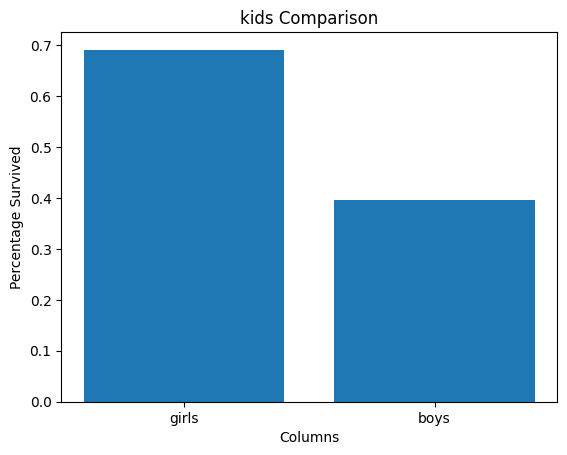

In [113]:
column1_mean = train[(train['Sex'] == 0) & (train['Age'] < 18) ]['Survived'].mean()
column2_mean = train[(train['Sex'] == 1) & (train['Age'] < 18) ]['Survived'].mean()

# Create a bar plot
plt.bar(['girls', 'boys'], [column1_mean, column2_mean])

# Set labels and title
plt.xlabel('Columns')
plt.ylabel('Percentage Survived')
plt.title('kids Comparison')

# Display the plot
plt.show()

# Feature Creation
- Embarked to binary of C or not C, other ports same odds of survival
- SibSp to Binary of less than 2 or not, less than two much higher survival rate
- Parch less than 4 to 0, more than 4 low survival rate


In [114]:

# People from C had largest survival rate
train['Embarked'].replace(1.0, 0.0, inplace = True)
train['Embarked'].replace(2.0, 1.0, inplace = True)


train.loc[train['SibSp'] < 3, ['SibSp']] = 0
train.loc[train['SibSp'] >= 3, ['SibSp']] = 1



train.loc[train['Parch'] <= 4, ['Parch']] = 0
train.loc[train['Parch'] > 4, ['Parch']] = 1


# provide extra context for children and parents



# Enhanced Random Forest Classifier
- new features
- new grid search

In [115]:
# Split the data into features (X) and target variable (y)
X = train.drop(columns=['Survived'])
y = train['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

'''

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 8],
    'max_features': [0.5]
}

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier()

# Perform grid search using cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best hyperparameters and best score
print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)
'''




# Initialize the Random Forest Classifier with best hyperparameters    (300, 10, 10, 1, 0.5)
rf_classifier = RandomForestClassifier(n_estimators=500,
                                       max_depth= 10,
                                       min_samples_split=10,
                                       min_samples_leaf=1,
                                       max_features = 0.5)

# Fit the classifier to the training data
rf_classifier.fit(X_train, y_train)

# Predict the target variable for the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8340807174887892


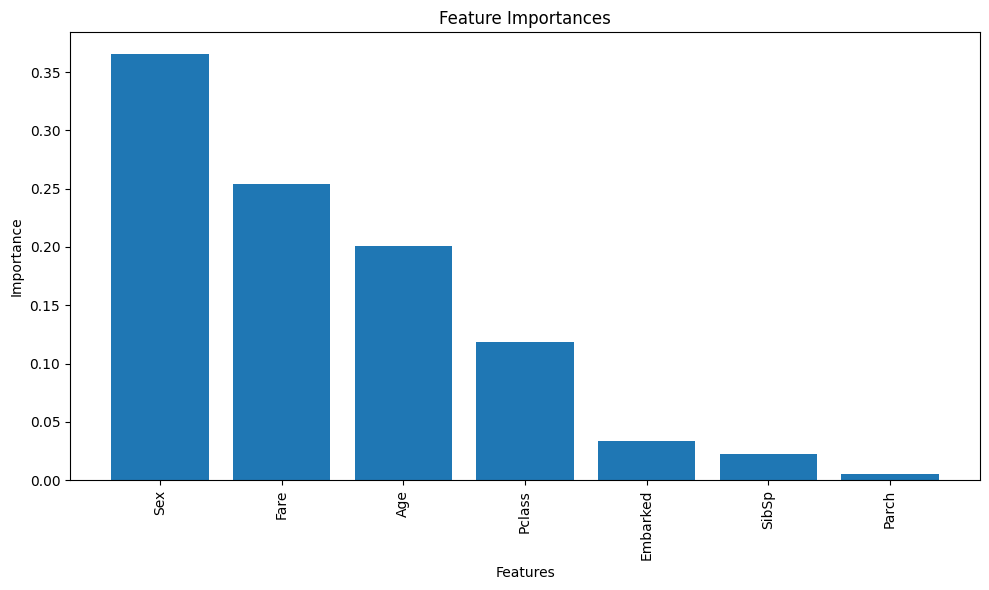

In [116]:
# Obtain feature importances
importances = rf_classifier.feature_importances_

# Create a list of feature names
feature_names = X_train.columns

# Create a dictionary to store feature importances
feature_importance_dict = dict(zip(feature_names, importances))

# Sort the dictionary by feature importance (in descending order)
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Extract sorted feature names and importances
sorted_feature_names = [f[0] for f in sorted_feature_importance]
sorted_importances = [f[1] for f in sorted_feature_importance]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importances)), sorted_importances, align='center')
plt.xticks(range(len(sorted_importances)), sorted_feature_names, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()

# Gradient Boosting Machine
- same features
- different model

In [117]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Create a Gradient Boosting Classifier
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)

# Fit the model to the training data
gbm.fit(X_train, y_train)

# Make predictions on the test data
y_pred = gbm.predict(X_test)

# Evaluate the model
accuracy = gbm.score(X_test, y_test)
print(accuracy)

0.8666666666666667


# Submission Attempt

In [118]:
test = pd.read_csv('test.csv')
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [119]:
ids = test['PassengerId']

test.replace('male', 1, inplace=True)
test.replace('female', 0, inplace=True)

test.drop(columns=['PassengerId','Name', 'Ticket', 'Cabin'], inplace=True)

test['Age'] = test.groupby(['Sex', 'Pclass'], group_keys=False)['Age'].apply(lambda x: x.fillna(x.median())) # replaces missing age with median age of rows with same class and sex very clever

test['Fare'].fillna(test['Fare'].median(), inplace = True)

test['Embarked'] = test['Embarked'].replace(['Q', 'S', 'C'], [0, 0, 1])

test['Embarked'].fillna(test['Embarked'].mode()[0], inplace=True)
test['Embarked'].isna().sum()

test.loc[test['SibSp'] <= 2, ['SibSp']] = 0
test.loc[test['SibSp'] > 2, ['SibSp']] = 1

test.loc[test['Parch'] < 4, ['Parch']] = 0
train.loc[train['Parch'] >= 4, ['Parch']] = 1



In [120]:
survived = gbm.predict(test)
survived

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [121]:
submission = pd.DataFrame()
submission['PassengerId'] = ids
submission['Survived'] = survived
submission.to_csv("submission.csv", index = False)